In [ ]:
# # Install stardist
# # Anacondaプロンプトで
# conda create --name stardist python=3.8
# conda activate stardist
# conda install jupyter
# pip install ipykernel
# ipython kernel install --user --name=stardist

# tensorflowのインストール
# pip install tensorflow==2.6.0
# pip install keras==2.6 # tensorflowのバージョンと一致していない不具合が出るため



# # その他
# conda install jupyter
# conda install -c conda-forge matplotlib

In [3]:
# モデルの読み込み

from stardist.models import StarDist2D

# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
5332992/5320433 [==============================] - 2s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Text(0.5, 1.0, 'prediction + input overlay')

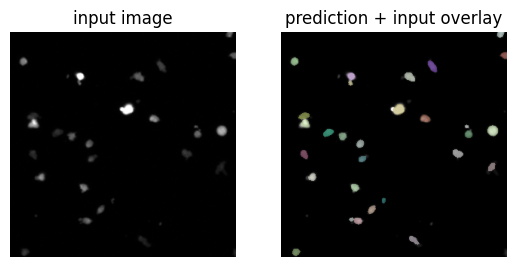

In [6]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from tifffile import imread

img = imread('./Sample/image.tif')
# 2D画像にする
img = img[0,:,:]

labels, _ = model.predict_instances(normalize(img))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

In [7]:
# compute metrics between ground-truth and prediction
'''
    Currently, the following metrics are implemented:
    'fp', 'tp', 'fn', 'precision', 'recall', 'accuracy', 'f1', 'criterion', 'thresh', 'n_true', 'n_pred', 'mean_true_score', 'mean_matched_score', 'panoptic_quality'
    Corresponding objects of y_true and y_pred are counted as true positives (tp), false positives (fp), and false negatives (fn)
    whether their intersection over union (IoU) >= thresh (for criterion='iou', which can be changed)
    * mean_matched_score is the mean IoUs of matched true positives
    * mean_true_score is the mean IoUs of matched true positives but normalized by the total number of GT objects
    * panoptic_quality defined as in Eq. 1 of Kirillov et al. "Panoptic Segmentation", CVPR 2019
    
    https://github.com/stardist/stardist/blob/a59f366f98a8728813a82553dfe20fa3d000e786/stardist/matching.py#L100
    accuracy: tp/(tp+fp+fn)
'''

from stardist.matching import matching

metrics =  matching(labels, labels)

print(metrics)


Matching(criterion='iou', thresh=0.5, fp=0, tp=29, fn=0, precision=1.0, recall=1.0, accuracy=1.0, f1=1.0, n_true=29, n_pred=29, mean_true_score=1.0, mean_matched_score=1.0, panoptic_quality=1.0)
